In [ ]:
import torch
import numpy as np
import pandas as pd
!pip install xFormers

In [ ]:
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vits14

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 223MB/s]


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

batch_size = 16
color_jitter = transforms.ColorJitter(0.8*1, 0.8*1, 0.8*1, 0.2*1)
rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
rnd_gray = transforms.RandomGrayscale(p=0.2)
color_distort = transforms.Compose([
rnd_color_jitter,
rnd_gray])


#
#transforms.RandomHorizontalFlip(p=0.5),
#transforms.RandomApply([transforms.GaussianBlur(kernel_size=(21, 21), sigma=(0.1, 2))], p=0.5),
#rnd_color_jitter,
#rnd_gray,

# Define the image transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
])

# Load the Flowers102 dataset
train_dataset = datasets.Flowers102(root='./data', split='train', download=True, transform=transform_train)
val_dataset = datasets.Flowers102(root='./data', split='val', download=True, transform=transform_val)
test_dataset = datasets.Flowers102(root='./data', split='test', download=True, transform=transform_test)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
"""
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

#FOOD
train_dataset_food = datasets.Food101(root='./data', split='train', download=True, transform=transform_train)
#val_dataset_food = datasets.Food101(root='./data', split='val', download=True, transform=transform_val)
test_dataset_food = datasets.Food101(root='./data', split='test', download=True, transform=transform_test)

train_loader_food = DataLoader(train_dataset_food, batch_size=16, shuffle=True, num_workers=4)
#val_loader_food = DataLoader(val_dataset_food, batch_size=16, shuffle=True, num_workers=4)
test_loader_food = DataLoader(test_dataset_food, batch_size=16, shuffle=True, num_workers=4)
"""
# Example: Iterate through the training DataLoader
for images, labels in train_loader:
    print(images.shape, labels.shape)  # Output image and label shapes
    break  # Only check one batch

KeyboardInterrupt: 

In [ ]:
batch_size = 16
#CIFAR10
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std = [0.1953, 0.1925, 0.1942]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std = [0.1953, 0.1925, 0.1942]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std = [0.1953, 0.1925, 0.1942]),
])

# CIFAR10 Dataset
train_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader_CIFAR10 = DataLoader(train_dataset_CIFAR10, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader_CIFAR10 = DataLoader(test_dataset_CIFAR10, batch_size=batch_size, shuffle=False, num_workers=4)

"""
#CIFAR100
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

train_dataset_CIFAR100 = datasets.Cifar100(root='./data', split='train', download=True, transform=transform_train)
val_dataset_CIFAR100 = datasets.Cifar100(root='./data', split='val', download=True, transform=transform_val)
test_dataset_CIFAR100 = datasets.Cifar100(root='./data', split='test', download=True, transform=transform_test)

train_loader_CIFAR100 = DataLoader(train_dataset_CIFAR100, batch_size=8, shuffle=True, num_workers=4)
val_loader_CIFAR100 = DataLoader(val_dataset_CIFAR100, batch_size=8, shuffle=True, num_workers=4)
test_loader_CIFAR100 = DataLoader(test_dataset_CIFAR100, batch_size=8, shuffle=True, num_workers=4)

#SUN397
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

train_dataset_SUN397 = datasets.SUN397(root='./data', split='train', download=True, transform=transform_train)
val_dataset_SUN397 = datasets.SUN397(root='./data', split='val', download=True, transform=transform_val)
test_dataset_SUN397 = datasets.SUN397(root='./data', split='test', download=True, transform=transform_test)

train_loader_SUN397 = DataLoader(train_dataset_SUN397, batch_size=8, shuffle=True, num_workers=4)
val_loader_SUN397 = DataLoader(val_dataset_SUN397, batch_size=8, shuffle=True, num_workers=4)
test_loader_SUN397 = DataLoader(test_dataset_SUN397, batch_size=8, shuffle=True, num_workers=4)


#Stanford Cars
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

train_dataset_StanfordCars = datasets.StanfordCars(root='./data', split='train', download=True, transform=transform_train)
val_dataset_StanfordCars = datasets.StanfordCars(root='./data', split='val', download=True, transform=transform_val)
test_dataset_StanfordCars = datasets.StanfordCars(root='./data', split='test', download=True, transform=transform_test)

train_loader_StanfordCars = DataLoader(train_dataset_StanfordCars, batch_size=8, shuffle=True, num_workers=4)
val_loader_StanfordCars = DataLoader(val_dataset_StanfordCars, batch_size=8, shuffle=True, num_workers=4)
test_loader_StanfordCars = DataLoader(test_dataset_StanfordCars, batch_size=8, shuffle=True, num_workers=4)
"""
"""
#Pascal VOC
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.functional.pil_to_tensor,
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    #transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

train_dataset_PascalVOC = datasets.VOCSegmentation(root='./data', year='2012', image_set='train', download=True, transform=transform_train)
val_dataset_PascalVOC = datasets.VOCSegmentation(root='./data', year='2012', image_set='val', download=True, transform=transform_val)
#test_dataset_PascalVOC = datasets.VOCSegmentation(root='./data', year='2012', image_set='test', download=True, transform=transform_test)

train_loader_PascalVOC = DataLoader(train_dataset_PascalVOC, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader_PascalVOC = DataLoader(val_dataset_PascalVOC, batch_size=batch_size, shuffle=True, num_workers=4)
#test_loader_PascalVOC = DataLoader(test_dataset_PascalVOC, batch_size=batch_size, shuffle=True, num_workers=4)
"""

#DTD
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5288, 0.4731, 0.4247], std=[0.1688, 0.1694, 0.1653]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5288, 0.4731, 0.4247], std=[0.1688, 0.1694, 0.1653]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5288, 0.4731, 0.4247], std=[0.1688, 0.1694, 0.1653]),
])


train_dataset_DTD = datasets.DTD(root='./data', split='train', download=True, transform=transform_train)
val_dataset_DTD = datasets.DTD(root='./data', split='val', download=True, transform=transform_val)
test_dataset_DTD = datasets.DTD(root='./data', split='test', download=True, transform=transform_test)

train_loader_DTD = DataLoader(train_dataset_DTD, batch_size=16, shuffle=True, num_workers=4)
val_loader_DTD = DataLoader(val_dataset_DTD, batch_size=16, shuffle=True, num_workers=4)
test_loader_DTD = DataLoader(test_dataset_DTD, batch_size=16, shuffle=True, num_workers=4)


#Oxford-IIIT Pets
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4783, 0.4459, 0.3957], std=[0.2254, 0.2223, 0.2240]),
    transforms.RandomResizedCrop(size=224, scale=(0.08, 1.0), ratio=(3/4, 4/3)),
    ])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4783, 0.4459, 0.3957], std=[0.2254, 0.2223, 0.2240]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4783, 0.4459, 0.3957], std=[0.2254, 0.2223, 0.2240]),
])


train_dataset_OxfordIIITPet = datasets.OxfordIIITPet(root='./data', split='trainval', download=True, transform=transform_train)
val_dataset_OxfordIIITPet = datasets.OxfordIIITPet(root='./data', split='test', download=True, transform=transform_val)
#test_dataset_OxfordIIITPet = datasets.OxfordIIITPet(root='./data', split='test', download=True, transform=transform_test)

train_loader_OxfordIIITPet = DataLoader(train_dataset_OxfordIIITPet, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader_OxfordIIITPet = DataLoader(val_dataset_OxfordIIITPet, batch_size=batch_size, shuffle=True, num_workers=4)
#test_loader_OxfordIIITPet = DataLoader(test_dataset_OxfordIIITPet, batch_size=batch_size, shuffle=True, num_workers=4)



data_loaders = {
    'DTD': [train_loader_DTD, val_loader_DTD, 47],
    'Flowers102': [train_loader, val_loader, 102],
    #'Food101': [train_loader_food, val_loader_food, test_loader_food],
    'CIFAR10': [train_loader_CIFAR10, test_loader_CIFAR10, 10],
    #'CIFAR100': [train_loader_CIFAR100, val_loader_CIFAR100, test_loader_CIFAR100],
    #'SUN397': [train_loader_SUN397, val_loader_SUN397, test_loader_SUN397],
    #'StanfordCars': [train_loader_StanfordCars, val_loader_StanfordCars, test_loader_StanfordCars],
    #'PascalVOC': [train_loader_PascalVOC, val_loader_PascalVOC],
    'OxfordIIITPet': [train_loader_OxfordIIITPet, val_loader_OxfordIIITPet, 37],
    #'Caltech101': [train_loader_Caltech101, val_loader_Caltech101, test_loader_Caltech101],
}



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def create_linear_input(x_tokens_list, use_n_blocks, use_avgpool):
    intermediate_output = x_tokens_list[-use_n_blocks:]
    output = torch.cat([class_token for _, class_token in intermediate_output], dim=-1)
    if use_avgpool:
        output = torch.cat(
            (
                output,
                torch.mean(intermediate_output[-1][0], dim=1),  # patch tokens
            ),
            dim=-1,
        )
        output = output.reshape(output.shape[0], -1)
    return output.float()


In [ ]:
from torch import nn
class LinearHead(nn.Module):
    def __init__(self, in_features=1920, out_features=101, bias=True):
        super(LinearHead, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.Sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.linear(x)
        return self.Sigmoid(x)


class LinearMultiHead(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(LinearMultiHead, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.layer3 = nn.Linear(hidden_dim2, hidden_dim1)
        self.layer4 = nn.Linear(hidden_dim1, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        x = self.softmax(x)
        return x



In [ ]:
import torch.optim as optim
input_dim = 1152
num_classes = 102
learning_rate = 1e-2
num_epochs = 100
batch_size=16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dinov2_vits14.to(device)

# Model, loss, and optimizer
model = LinearHead(input_dim, num_classes).to(device)#LinearMultiHead(384, 768, 384, 102).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs*64, eta_min=0)


# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (imgs, labels) in enumerate(train_loader):

        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        feature=None
        with torch.no_grad():
            feature = dinov2_vits14.get_intermediate_layers(imgs, 3, return_class_token=True)
            feature = create_linear_input(feature, 3, False)

        outputs = model(feature)

        loss = criterion(outputs, labels)

        # BACK BY POPULAR DEMAND
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Track the loss
        running_loss += loss.item()

        if i % 50 == 49:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Validation after each epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for img, labels in val_loader:

            img = img.to(device)
            feature = dinov2_vits14.get_intermediate_layers(img, 3, return_class_token=True)
            feature = create_linear_input(feature, 3, False)


            labels = labels.to(device)
            outputs = model(feature)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy after Epoch {epoch+1}: {accuracy:.2f}%')

print('Finished Training')


Epoch [1/100], Step [50/64], Loss: 4.3549


KeyboardInterrupt: 

In [ ]:
import torch.optim as optim
def run_training_and_test(train_loader, val_loader, num_epochs, learning_rate, num_classes):
  batch_size=16
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  dinov2_vits14.to(device)


  # Model, loss, and optimizer
  model = LinearHead(1152, num_classes).to(device)#LinearMultiHead(768, 1536, 768, num_classes).to(device)#
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, int(num_epochs*len(train_loader)), eta_min=0)
  all_accuracy = []

    # Training loop
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        feature=None
        with torch.no_grad():
            feature = dinov2_vits14.get_intermediate_layers(imgs, 3, return_class_token=True)
            feature = create_linear_input(feature, 3, False)

        outputs = model(feature)

        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Track the loss
        running_loss += loss.item()

        if i % 50 == 49:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

      # Validation after each epoch
      model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
          for img, labels in val_loader:

              img = img.to(device)
              feature = dinov2_vits14.get_intermediate_layers(img, 3, return_class_token=True)
              feature = create_linear_input(feature, 3, False)


              labels = labels.to(device)
              outputs = model(feature)

              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      all_accuracy.append(accuracy)
      print(f'Validation Accuracy after Epoch {epoch+1}: {accuracy:.2f}%')
  return all_accuracy



In [ ]:
num_epochs = 10
learning_rate = 1e-2
results = {}
for key in data_loaders:
  train_loader = data_loaders[key][0]
  val_loader = data_loaders[key][1]
  num_classes = data_loaders[key][2]
  results[key] = run_training_and_test(train_loader, val_loader, num_epochs, learning_rate, num_classes)

Epoch [1/10], Step [50/118], Loss: 3.6709
Epoch [1/10], Step [100/118], Loss: 3.4474
Validation Accuracy after Epoch 1: 47.45%
Epoch [2/10], Step [50/118], Loss: 3.3043
Epoch [2/10], Step [100/118], Loss: 3.2404
Validation Accuracy after Epoch 2: 61.54%
Epoch [3/10], Step [50/118], Loss: 3.2680
Epoch [3/10], Step [100/118], Loss: 3.2228
Validation Accuracy after Epoch 3: 66.60%
Epoch [4/10], Step [50/118], Loss: 3.1355
Epoch [4/10], Step [100/118], Loss: 3.1237
Validation Accuracy after Epoch 4: 67.87%
Epoch [5/10], Step [50/118], Loss: 3.1905
Epoch [5/10], Step [100/118], Loss: 3.1156
Validation Accuracy after Epoch 5: 68.67%
Epoch [6/10], Step [50/118], Loss: 3.0967
Epoch [6/10], Step [100/118], Loss: 3.0802
Validation Accuracy after Epoch 6: 69.47%
Epoch [7/10], Step [50/118], Loss: 3.1684
Epoch [7/10], Step [100/118], Loss: 3.1078
Validation Accuracy after Epoch 7: 69.63%
Epoch [8/10], Step [50/118], Loss: 3.1484
Epoch [8/10], Step [100/118], Loss: 3.0935
Validation Accuracy after 

In [ ]:
print([key for key in results.keys()])
print([max(results[key]) for key in results.keys()])

['DTD', 'Flowers102', 'CIFAR10', 'OxfordIIITPet']
[69.94680851063829, 95.68627450980392, 95.06, 92.4502589261379]


In [ ]:
print(max(results["DTD"]), max(results["Flowers102"]))
dtd_flowers_c10 = results.copy()
dtd_flowers_c10["C10"] = 95.0
dtd_flowers_c10["pets"] = 48.49

KeyError: 'DTD'

In [ ]:
dtd_flowers_c10["pets"] = 48.49
print(max(dtd_flowers_c10["DTD"]), max(dtd_flowers_c10["Flowers102"]), dtd_flowers_c10["C10"], dtd_flowers_c10["pets"])

53.191489361702125 43.03921568627451 95.0 48.49


In [ ]:
results2 = {}
for key in data_loaders:
  results2["key"] = results[key][-1]



df = pd.DataFrame(results2)

# Step 2: DataFrame to LaTeX
latex_code = df.to_latex(index=False)


[  0   5  15 255]


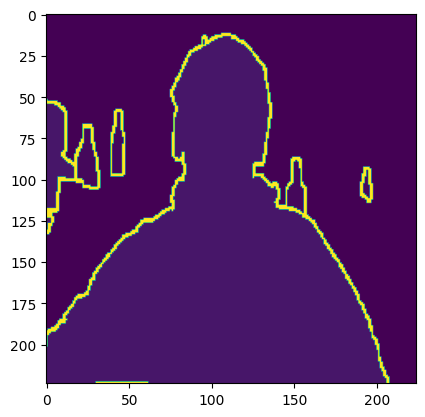

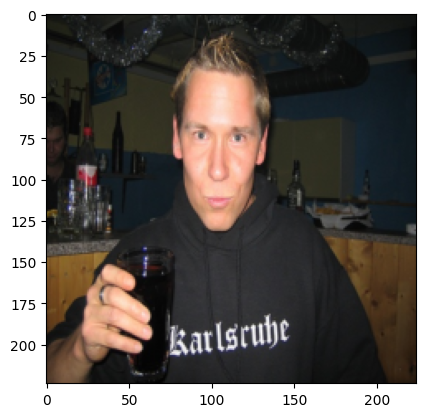

In [ ]:
import matplotlib.pyplot as plt
plt.figure(2)
plt.imshow(torch.round(train_dataset[5][1].squeeze(0)).numpy())
plt.figure(1)
val = np.transpose(train_dataset[5][0].numpy(), (1, 2, 0))
plt.imshow(val)

print(np.unique(train_dataset[5][1].numpy()))


In [ ]:
from torch import nn
class LinearHead(nn.Module):
    def __init__(self, in_features=1920, out_features=101, bias=True):
        super(LinearHead, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
from torchvision.datasets import VOCSegmentation
from torchvision import transforms
from torchvision.transforms import InterpolationMode
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np

color_jitter = transforms.ColorJitter(0.8*1, 0.8*1, 0.8*1, 0.2*1)
rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
rnd_gray = transforms.RandomGrayscale(p=0.2)


batch_size = 16

replace_255_with_0 = transforms.Lambda(lambda img: torch.where(img == 255, torch.tensor(0, dtype=img.dtype), img))

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((448, 448)),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=(21, 21), sigma=(0.1, 2))], p=0.5),
    rnd_gray,
    #rnd_color_jitter,
])

target_transform = transforms.Compose([
    transforms.PILToTensor(),
    replace_255_with_0,
    transforms.Resize((32, 32), interpolation=InterpolationMode.NEAREST_EXACT),
      # Resize masks to a consistent size
])


train_dataset = VOCSegmentation(root='./data', year='2012', image_set='train',
                                download=True, transform=transform, target_transform=target_transform)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((448, 448)),
    transforms.Normalize(mean=[0.4330, 0.3819, 0.2964], std=[0.2587, 0.2093, 0.2210]),

])

target_transform_val = transforms.Compose([
    transforms.PILToTensor(),
    replace_255_with_0,
    transforms.Resize((32, 32), interpolation=InterpolationMode.NEAREST_EXACT),

])


val_dataset = VOCSegmentation(root='./data', year='2012', image_set='val',
                                download=True, transform=transform, target_transform=target_transform_val)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

100%|██████████| 1999639040/1999639040 [00:57<00:00, 34988067.18it/s]


Extracting ./data/VOCtrainval_11-May-2012.tar to ./data
Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


In [ ]:
import torch.optim as optim
!pip install torchmetrics
import torchmetrics

num_classes = 22
learning_rate = 1e-2
num_epochs = 50
num_layers = 3
input_dim = 384*num_layers
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dinov2_vits14.to(device)
iou_metric = torchmetrics.JaccardIndex(task="multiclass", num_classes=num_classes).to(device)


model = LinearHead(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs*len(train_loader.dataset), eta_min=0.0001)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    print(epoch)
    for i, (imgs, patch_labels) in enumerate(train_loader):
      imgs = imgs.to(device)
      patch_labels = patch_labels.to(device)

      feature=None
      with torch.no_grad():
          feature = dinov2_vits14.get_intermediate_layers(imgs, num_layers, return_class_token=True)


      outputs = []

      for patch_idx in range(feature[0][0].shape[1]):
          with torch.no_grad():
            patch_features = torch.cat(
              [feature[layer_idx][0][:, patch_idx, :] for layer_idx in range(num_layers)], dim=-1
                                )
          patch_output = model(patch_features)
          outputs.append(patch_output)



      outputs = torch.stack(outputs, dim=1)
      outputs = outputs.view(-1, num_classes)
      patch_labels = patch_labels.view(-1)


      loss = criterion(outputs, patch_labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      scheduler.step()

      # Track the loss
      running_loss += loss.item()


    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    iou_sum = 0.0
    total_samples = 0
    iou_metric.reset()
    with torch.no_grad():  # No gradients during validation
        for i, (imgs, patch_labels) in enumerate(val_loader):
            imgs = imgs.to(device)
            patch_labels = patch_labels.to(device)

            # Forward pass
            feature = dinov2_vits14.get_intermediate_layers(imgs, num_layers, return_class_token=True)

            outputs = []

            for patch_idx in range(feature[0][0].shape[1]):
                patch_features = torch.cat(
                    [feature[layer_idx][0][:, patch_idx, :] for layer_idx in range(num_layers)], dim=-1)

                patch_output = model(patch_features)
                outputs.append(patch_output)



            outputs = torch.stack(outputs, dim=1)

            outputs = outputs.view(-1, num_classes)
            patch_labels = patch_labels.view(-1)
            loss = criterion(outputs, patch_labels)
            val_loss += loss.item()


            preds = torch.argmax(outputs, dim=1)


            preds = preds.view(-1, int(np.sqrt(feature[0][0].shape[1])), int(np.sqrt(feature[0][0].shape[1])))
            patch_labels = patch_labels.view(-1, int(np.sqrt(feature[0][0].shape[1])), int(np.sqrt(feature[0][0].shape[1])))


            iou_metric.update(preds, patch_labels)
        print(patch_labels.shape)
        avg_val_loss = val_loss / len(val_loader)
        avg_mIoU = iou_metric.compute().item()
        print(avg_val_loss, avg_mIoU)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 14.3 MB/s eta 0:00:00
0
torch.Size([9, 32, 32])
0.36093120195053435 0.4731627404689789
1


torch.Size([1, 256, 22])


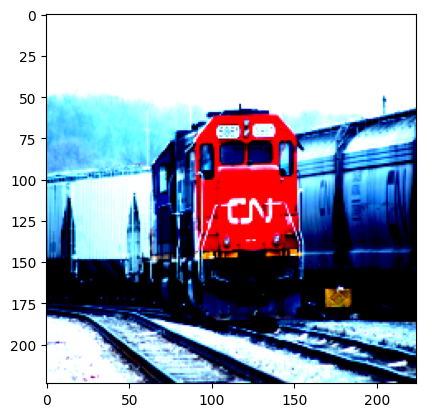

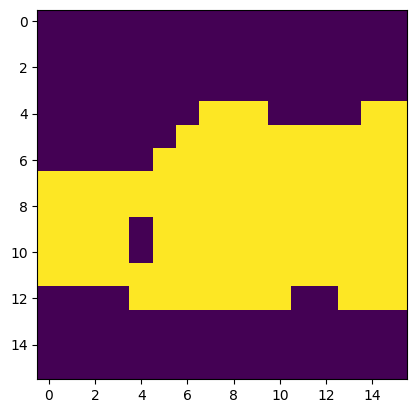

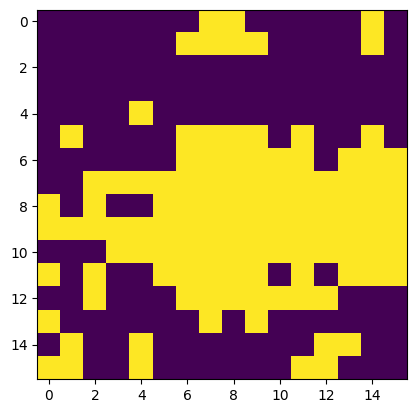

In [ ]:
import matplotlib.pyplot as plt
image, target = val_loader.dataset[500]
feature=dinov2_vits14.get_intermediate_layers(image.unsqueeze(0).to(device), 4, return_class_token=True)
outputs = []
patch_output = []
for patch_idx in range(feature[0][0].shape[1]):
    patch_features = torch.cat(
        [feature[layer_idx][0][:,patch_idx, :] for layer_idx in range(num_layers)], dim=-1)

    patch_output = model(patch_features)
    outputs.append(patch_output)



outputs = torch.stack(outputs, dim=1)
print(outputs.shape)
outputs = outputs.view(-1, num_classes)
patch_labels = patch_labels.view(-1)
preds = torch.argmax(outputs, dim=1)
res = preds.reshape((16, 16)).cpu().numpy()


plt.figure(1)
plt.imshow( np.transpose(image, (1, 2, 0)))
plt.figure(2)
plt.imshow(target.squeeze(0))
plt.figure(3)
plt.imshow(res >0.9)


In [ ]:
features = dinov2_vits14.get_intermediate_layers(imgs, n=4, return_class_token=True)
print(features[0][0].shape)
# Example: getting the patch features for layer 10
patch_features_layer_10 = features[0][0]  # First layer's patch features

# Loop through and collect patch features from 4 layers deep
patch_features = []
for i, layer_features in enumerate(features):
    patch_features.append(layer_features[0])
    print(layer_features[0].shape)




torch.Size([8, 1024, 384])
torch.Size([8, 1024, 384])
torch.Size([8, 1024, 384])
torch.Size([8, 1024, 384])
torch.Size([8, 1024, 384])


In [ ]:
*image, target = train_dataset[500]
dinov2_vits14.get_intermediate_layers(image.unsqueeze(0).to(device), 1, return_class_token=True)[0][0][:,1,:].shape

torch.Size([1, 384])

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 20.4 MB/s eta 0:00:00


In [ ]:
features = dinov2_vits14.get_intermediate_layers(imgs, n=1, return_class_token=True)
features[0][1].shape

torch.Size([8, 384])